<a href="https://colab.research.google.com/github/dioz-s/StudyGroup_ML/blob/main/tugas_ML_Study_Group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/slavaspirin/Toronto-housing-price-prediction/master/houses.csv"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    csv_path = os.path.join(housing_path, "housing.csv")
    urllib.request.urlretrieve(housing_url, csv_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()
housing.head()

,index,title,final_price,list_price,bedrooms,bathrooms,sqft,parking,description,mls,type,full_link,full_address,lat,long,city_district,mean_district_income,district_code
0,0,"1303 - 38 Grenville St, Toronto (C4461599) | Z...",855000,870000,2 + 1 beds,2 baths,800–899 sq. ft.,1 parking,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"38 Grenville St, Toronto , Ontario, Canada",43.661896,-79.385748,Bay Street Corridor,56526,76
1,1,"2 Cabot Crt, Toronto (W4502992) | Zoocasa",885000,898000,3 beds,2 baths,N/A sq. ft.,6 parking,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,https://www.zoocasa.com/toronto-on-real-estate...,"2 Cabot Crt, Toronto , Ontario, Canada",43.646982,-79.530356,Islington-City Centre West,52787,14
2,2,"1504 - 30 Roehampton Ave, Toronto (C4511330) |...",550000,549900,1 beds,1 baths,500–599 sq. ft.,no parking,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"30 Roehampton Ave, Toronto , Ontario, Canada",43.708472,-79.397498,Mount Pleasant West,57039,104
3,3,"514 - 65 East Liberty St, Toronto (C4515763) |...",665000,600000,1 + 1 beds,1 baths,600–699 sq. ft.,1 parking,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"65 East Liberty St, Toronto , Ontario, Canada",43.638399,-79.414448,Niagara,70623,82
4,4,"61 Twelfth St, Toronto (W4519375) | Zoocasa",825513,839000,2 beds,2 baths,N/A sq. ft.,1 parking,Location! Location! Location. Your Cottage In ...,W4519375,Detached,https://www.zoocasa.com/toronto-on-real-estate...,"61 Twelfth St, Toronto , Ontario, Canada",43.597096,-79.509612,New Toronto,44101,18


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15236 entries, 0 to 15235
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 15236 non-null  int64  
 1   title                 15236 non-null  object 
 2   final_price           15236 non-null  int64  
 3   list_price            15236 non-null  int64  
 4   bedrooms              15236 non-null  object 
 5   bathrooms             15236 non-null  object 
 6   sqft                  15236 non-null  object 
 7   parking               15236 non-null  object 
 8   description           15187 non-null  object 
 9   mls                   15236 non-null  object 
 10  type                  15236 non-null  object 
 11  full_link             15236 non-null  object 
 12  full_address          15236 non-null  object 
 13  lat                   15236 non-null  float64
 14  long                  15236 non-null  float64
 15  city_district      

In [ ]:
print(housing.columns)

Index(['index', 'title', 'final_price', 'list_price', 'bedrooms', 'bathrooms',
       'sqft', 'parking', 'description', 'mls', 'type', 'full_link',
       'full_address', 'lat', 'long', 'city_district', 'mean_district_income',
       'district_code'],
      dtype='object')


In [ ]:
housing["city_district"].value_counts()

,count
city_district,
Waterfront Communities-The Island,1148
Niagara,533
Mimico (includes Humber Bay Shores),523
Willowdale East,453
Islington-City Centre West,417
...,...
University,26
Ionview,24
Thistletown-Beaumond Heights,23


In [ ]:
housing.describe()

,index,final_price,list_price,lat,long,mean_district_income,district_code
count,15236.000000,1.523600e+04,1.523600e+04,15236.000000,15236.000000,15236.000000,15236.000000
mean,9519.656537,8.827034e+05,8.750877e+05,43.702662,-79.394661,56063.029995,71.301720
std,4882.709492,6.189028e+05,6.357729e+05,0.056804,0.095439,32546.384030,38.676601
min,0.000000,1.030000e+05,1.049000e+05,43.588176,-79.621693,25989.000000,1.000000
25%,5676.500000,5.350000e+05,5.290000e+05,43.652058,-79.454611,34904.000000,39.000000
50%,9803.500000,7.150000e+05,6.999000e+05,43.690978,-79.395589,50580.000000,76.000000
75%,13668.250000,9.892475e+05,9.699000e+05,43.755911,-79.335239,67757.000000,101.000000
max,17543.000000,1.318000e+07,1.318000e+07,43.839372,-79.124094,308010.000000,140.000000


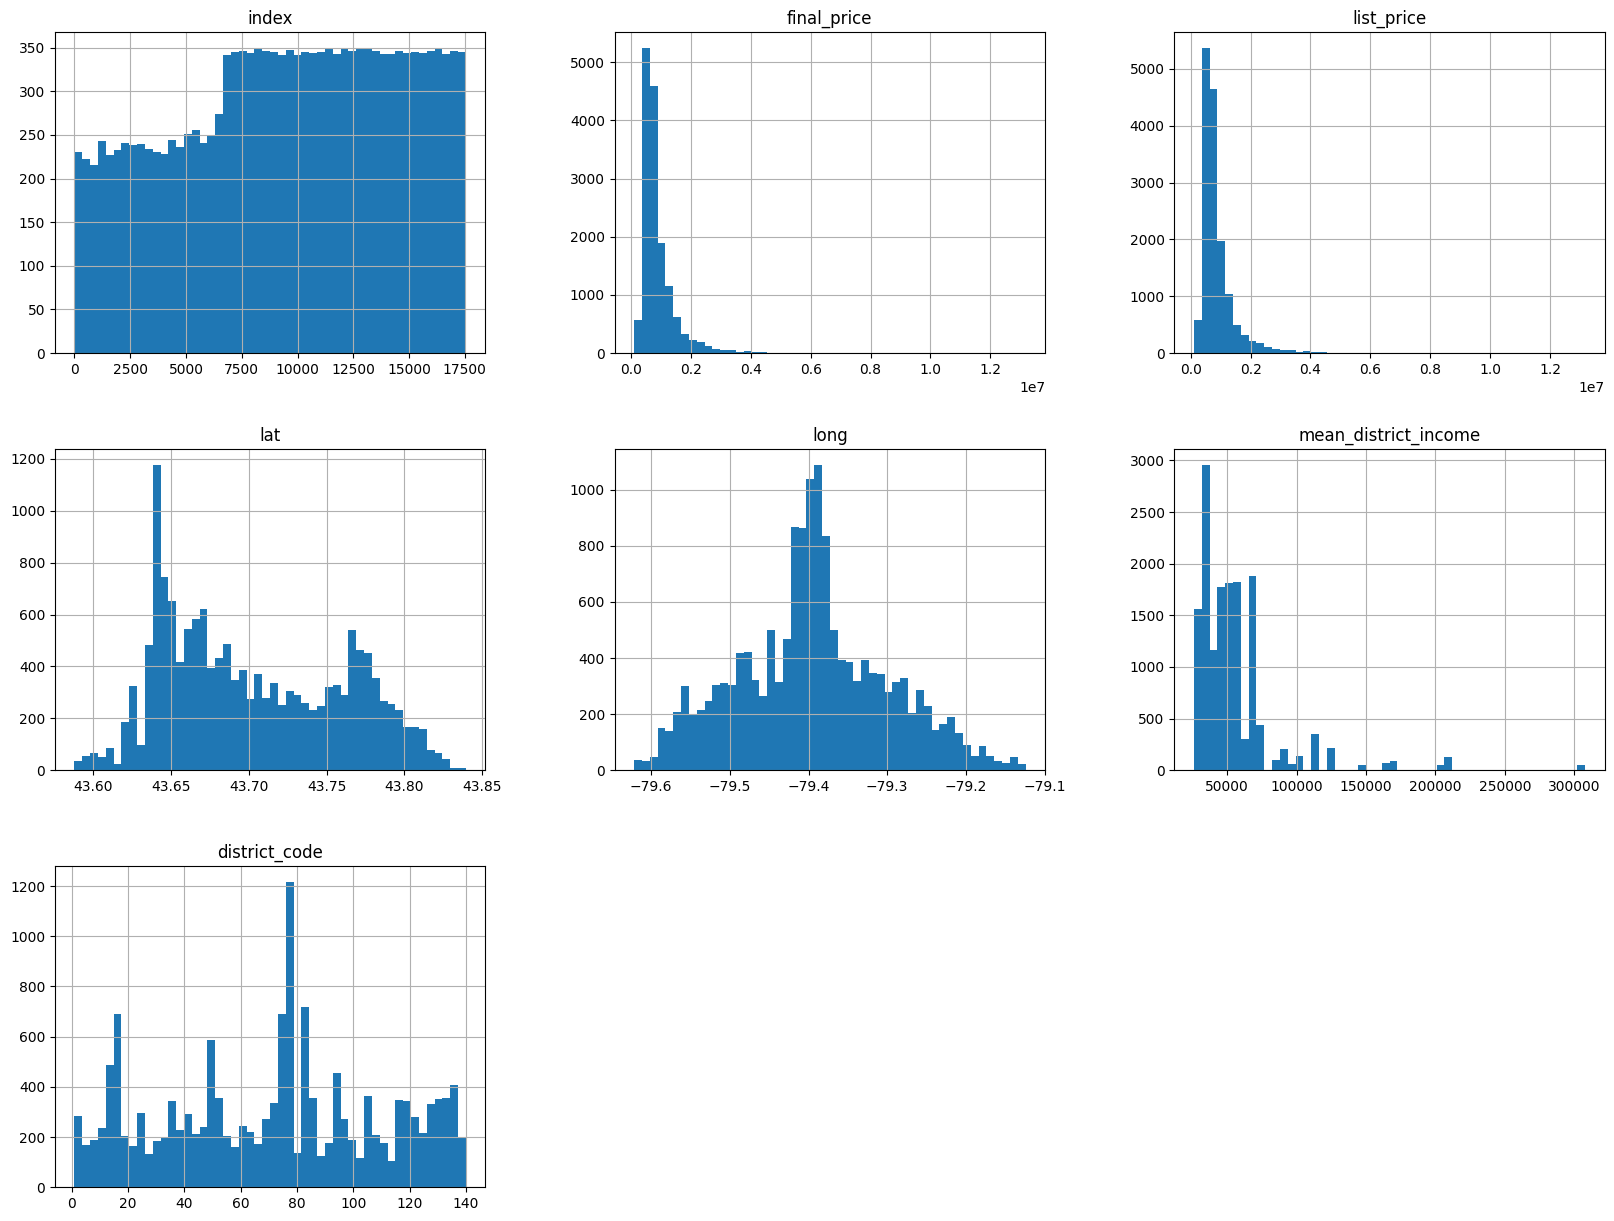

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='long', ylabel='lat'>

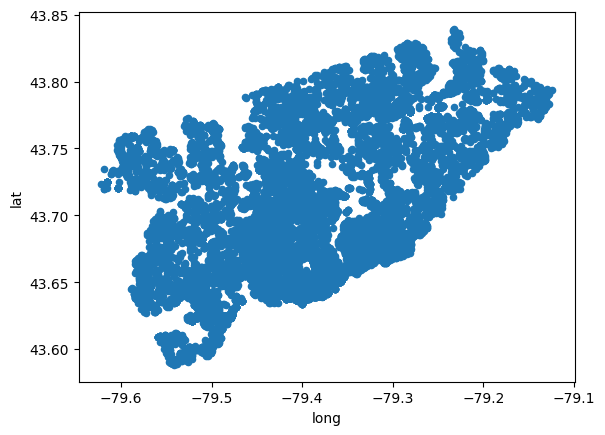

In [ ]:
housing.plot(kind="scatter", x="long", y="lat")

<Axes: xlabel='long', ylabel='lat'>

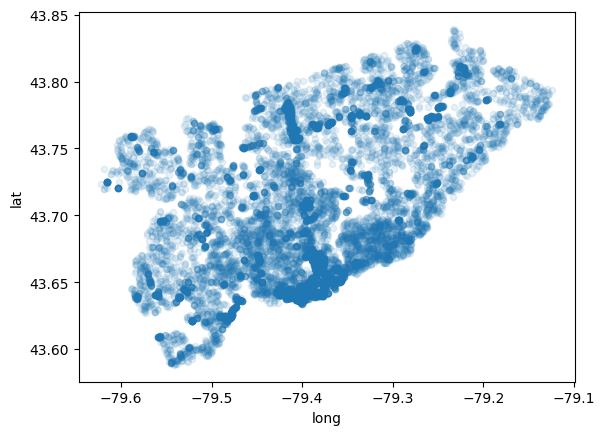

In [ ]:
housing.plot(kind="scatter", x="long", y="lat", alpha=0.1)

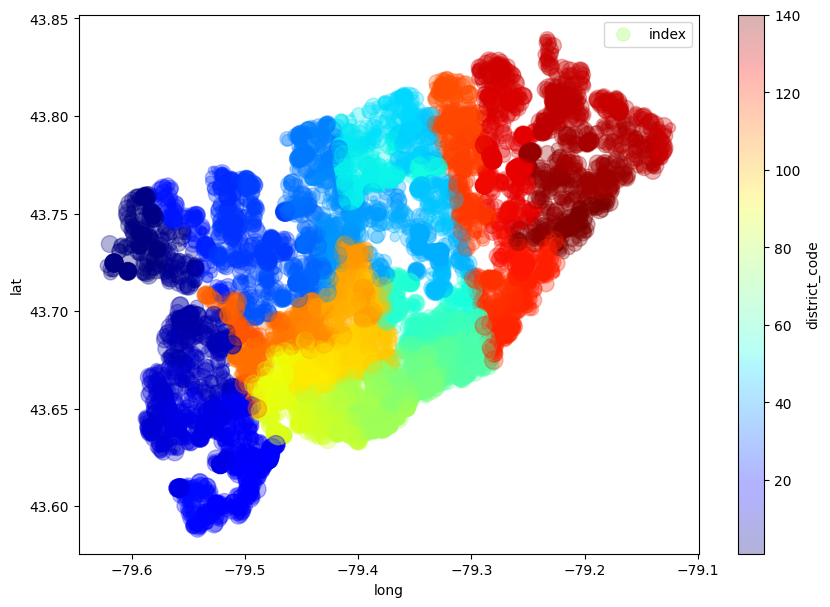

In [ ]:
housing['sqft'] = pd.to_numeric(housing['sqft'], errors='coerce')

housing.plot(kind="scatter", x="long", y="lat", alpha=0.3,
             s=housing["index"]/100, label="index", figsize=(10,7),
             c="district_code", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

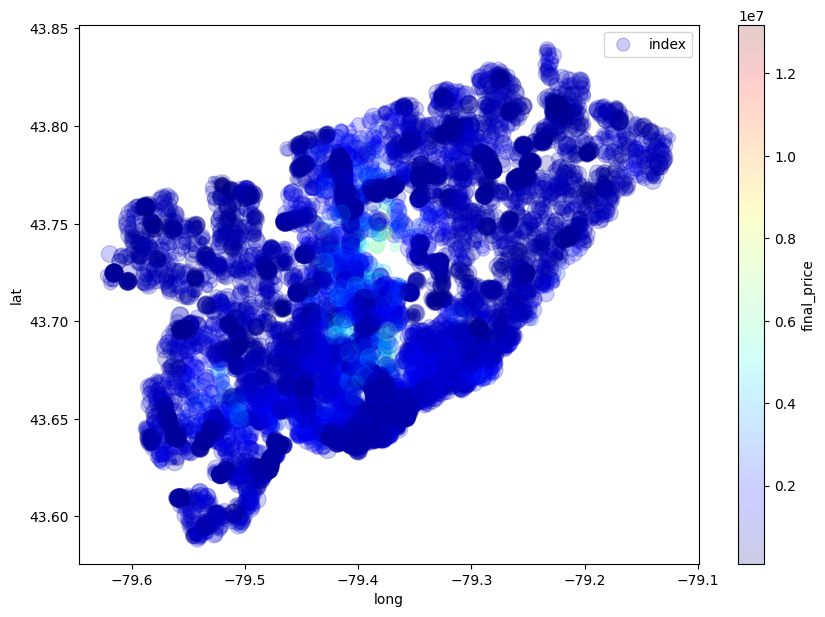

In [ ]:
housing['sqft'] = pd.to_numeric(housing['sqft'], errors='coerce')

housing.plot(kind="scatter", x="long", y="lat", alpha=0.2,
             s=housing["index"]/100, label="index", figsize=(10,7),
             c="final_price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [ ]:
print(housing.columns)

Index(['index', 'title', 'final_price', 'list_price', 'bedrooms', 'bathrooms',
       'sqft', 'parking', 'description', 'mls', 'type', 'full_link',
       'full_address', 'lat', 'long', 'city_district', 'mean_district_income',
       'district_code'],
      dtype='object')


In [ ]:
total_rooms = 'bedrooms'+'bathrooms'

In [ ]:
corr_matrix = housing.select_dtypes(include=['number']).corr()

In [ ]:
corr_matrix["final_price"].sort_values(ascending=False)

,final_price
final_price,1.000000
list_price,0.991040
mean_district_income,0.500800
district_code,-0.009173
long,-0.038274
index,-0.044235
lat,-0.079792
sqft,NaN


array([[<Axes: xlabel='final_price', ylabel='final_price'>,
        <Axes: xlabel='list_price', ylabel='final_price'>,
        <Axes: xlabel='mean_district_income', ylabel='final_price'>],
       [<Axes: xlabel='final_price', ylabel='list_price'>,
        <Axes: xlabel='list_price', ylabel='list_price'>,
        <Axes: xlabel='mean_district_income', ylabel='list_price'>],
       [<Axes: xlabel='final_price', ylabel='mean_district_income'>,
        <Axes: xlabel='list_price', ylabel='mean_district_income'>,
        <Axes: xlabel='mean_district_income', ylabel='mean_district_income'>]],
      dtype=object)

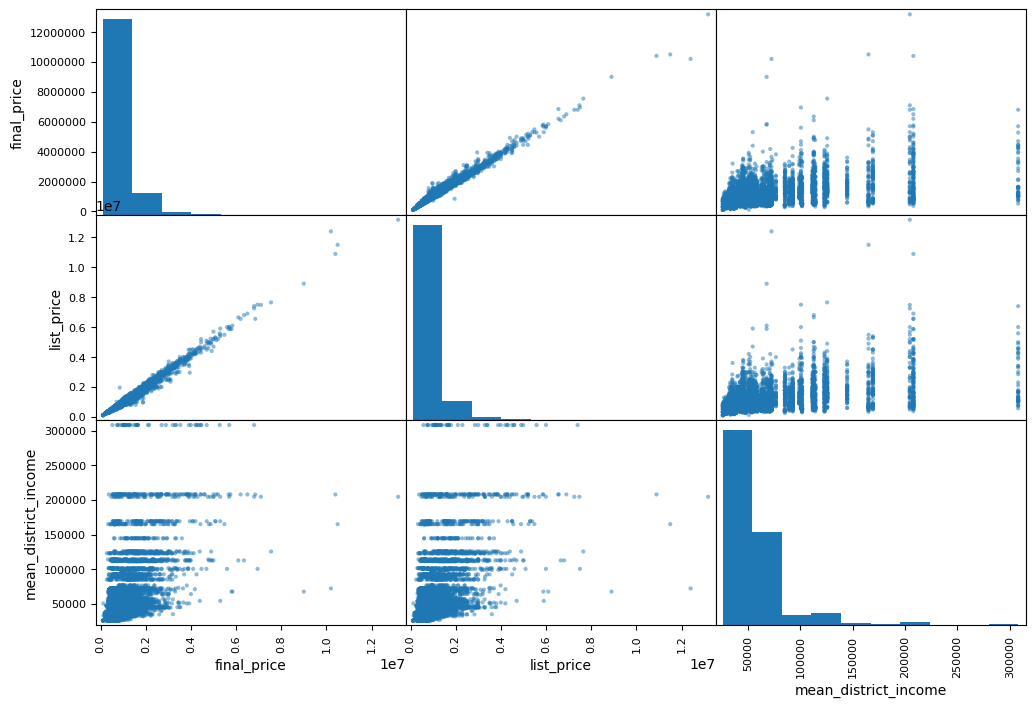

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["final_price", "list_price", "bedrooms",
              "mean_district_income"]
scatter_matrix(housing[attributes], figsize=(12, 8))